In [1]:
import os
import cv2
import glob as gb
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
# Tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout , BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  
from tensorflow.keras.utils import normalize

# metrics
from sklearn.metrics import classification_report, confusion_matrix

2024-05-09 16:34:38.167200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 16:34:38.167325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 16:34:38.322824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Open files of datasets

In [2]:
# train_file = "/kaggle/input/tomato-village/Variant-a(Multiclass Classification)/train"
#Adasyn
#train_file = "/kaggle/input/smote-implementation/tomato-village-Adasyn"

#smote
train_file = "/kaggle/input/smote-implementation/tomato-village"


for folder in os.listdir(train_file):
    files_folder = os.path.join(train_file, folder)
    files = gb.glob(os.path.join(files_folder, "*.jpg"))
    print(f"For Training Data, Found {len(files)} in folder {folder}")

For Training Data, Found 716 in folder Magnesium Deficiency
For Training Data, Found 716 in folder Late_blight
For Training Data, Found 716 in folder Pottassium Deficiency
For Training Data, Found 716 in folder Early_blight
For Training Data, Found 716 in folder Spotted Wilt Virus
For Training Data, Found 716 in folder Healthy
For Training Data, Found 716 in folder Nitrogen Deficiency
For Training Data, Found 716 in folder Leaf Miner


In [3]:
test_file = r"/kaggle/input/tomato-village/Variant-a(Multiclass Classification)/test"

for folder in os.listdir(test_file):
    files_folder = os.path.join(test_file , folder)
    files = gb.glob(pathname=os.path.join(files_folder , "*.jpg"))
    print(f"For Testing Data, Found {len(files)} in Folder  {folder}")

For Testing Data, Found 95 in Folder  Magnesium Deficiency
For Testing Data, Found 92 in Folder  Late_blight
For Testing Data, Found 8 in Folder  Pottassium Deficiency
For Testing Data, Found 50 in Folder  Early_blight
For Testing Data, Found 53 in Folder  Spotted Wilt Virus
For Testing Data, Found 22 in Folder  Healthy
For Testing Data, Found 37 in Folder  Nitrogen Deficiency
For Testing Data, Found 104 in Folder  Leaf Miner


In [4]:
label = {"Magnesium Deficiency" : 0 , "Late_blight" : 1 , "Pottassium Deficiency" : 2,
        "Early_blight" : 3 , "Spotted Wilt Virus" : 4 , "Healthy" : 5 , "Nitrogen Deficiency" : 6,
        "Leaf Miner" : 7}

print(len(label))


8


In [5]:
X_train = []
y_train = []

for folder in os.listdir(train_file):
    files_folder = os.path.join(train_file , folder)
    files = gb.glob(pathname=os.path.join(files_folder , "*.jpg"))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (200,200))
        X_train.append(list(image_array))
        y_train.append(label[folder])
        

        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
y_train

array([0, 0, 0, ..., 7, 7, 7])

In [7]:
print(f"len X Train is {len(X_train)}")


len X Train is 5728


In [8]:
len(y_train)

5728

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2 , shuffle=True)

In [10]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (4582, 200, 200, 3)
Shape of X_valid: (1146, 200, 200, 3)
Shape of y_train: (4582,)
Shape of y_valid: (1146,)


In [11]:
X_test = []
y_test = []

for folder in os.listdir(test_file):
    files_folder = os.path.join(test_file , folder)
    files = gb.glob(pathname=os.path.join(files_folder , "*.jpg"))
    for file in files:
        image = cv2.imread(file)
        array_image = cv2.resize(image , (200,200))
        X_test.append(list(array_image))
        y_test.append(label[folder])
        

        
        
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
print(f"len X Test is {len(X_test)}")

len X Test is 461


In [13]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (461, 200, 200, 3)
Shape of y_test: (461,)


In [14]:
label = {"Magnesium Deficiency" : 0 , "Late_blight" : 1 , "Pottassium Deficiency" : 2,
        "Early_blight" : 3 , "Spotted Wilt Virus" : 4 , "Healthy" : 5 , "Nitrogen Deficiency" : 6,
        "Leaf Miner" : 7}

def getlabel(n):
    for x , y in label.items():
        if n==y:
            return x

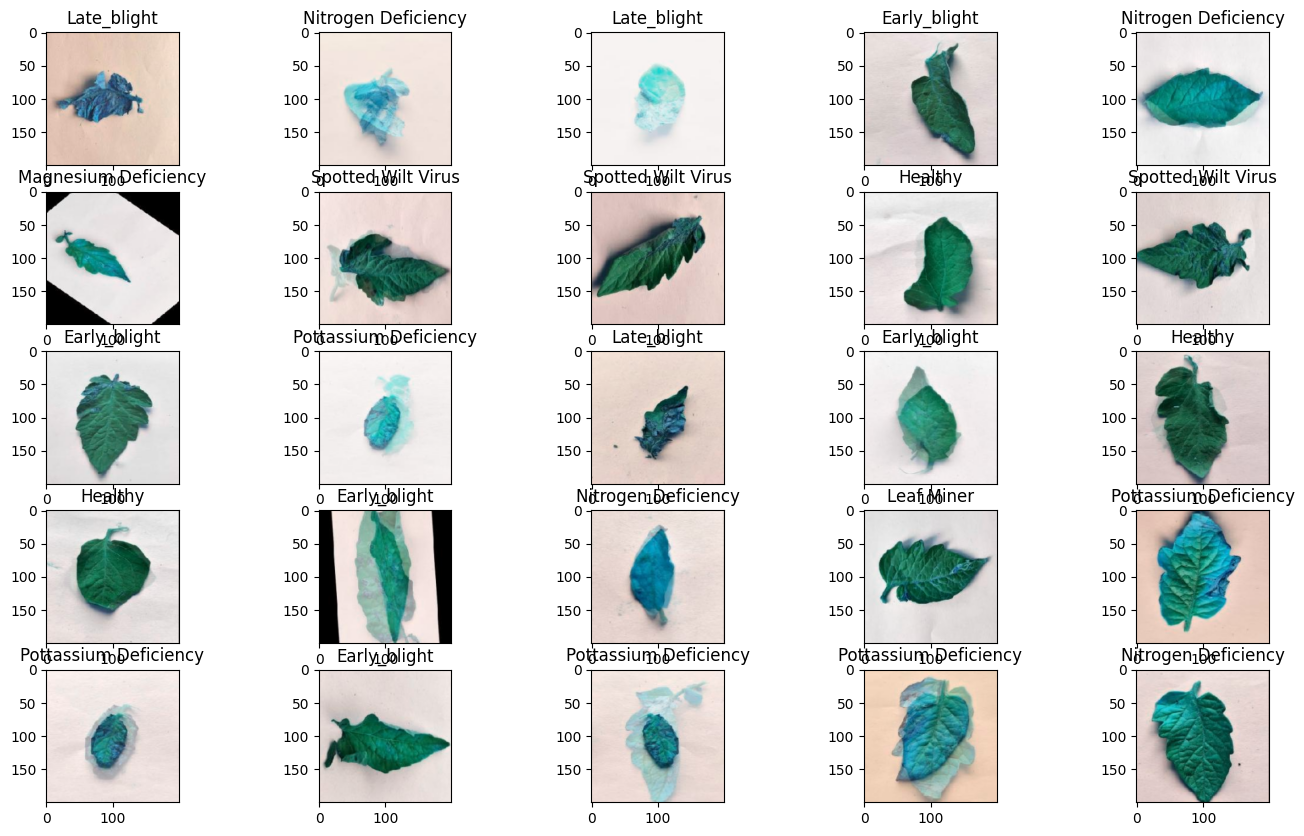

In [15]:

plt.figure(figsize=(17, 10))
for n, i in enumerate(list(np.random.randint(0, len(X_train), 25))):
    plt.subplot(5, 5, n+1)
    plt.imshow(X_train[i])
    plt.title(getlabel(y_train[i]))
plt.show() 

In [16]:
# Display image in all folder
# for folder in os.listdir(train_file):
#     folder_path = os.path.join(train_file, folder)
#     files = os.listdir(folder_path)
#     random_image = random.choice(files)
#     img_path = os.path.join(folder_path, random_image)
#     img = plt.imread(img_path)
#     plt.imshow(img)
#     plt.title(f"Sample image from {folder}" , fontsize=12 , color="m")
#     plt.show()


In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

In [18]:
input_shape = X_train[0].shape
num_classes = len(np.unique(y_train))
print("input_shape is == ",input_shape)
print("number of classes is == ",num_classes)

input_shape is ==  (200, 200, 3)
number of classes is ==  8


In [19]:
from tensorflow.keras import layers, models


input_shape = (200, 200, 3)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout layer added for regularization
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer added for regularization
    layers.Dense(8, activation='softmax')  # Assuming 8 classes
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [20]:
# model = Sequential([
#     Conv2D(filters=128 , kernel_size=(3,3),activation="relu",
#                 input_shape=input_shape),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
#     Conv2D(filters=64 , kernel_size=(3,3),strides=(1,1),activation="relu"),
#     MaxPooling2D(pool_size=(2,2)),
#     Conv2D(filters=64 , kernel_size=(3,3),strides=(1,1),activation="relu"),
#     MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
#     Conv2D(filters=128 , kernel_size=(3,3),strides=(1,1),activation="relu"),
#     MaxPooling2D(pool_size=(2,2) , strides=(2,2)),
    
    
    
#     Flatten(),
#     Dense(128 , activation="relu"),
#     Dropout(0.5),
#     Dense(64 , activation="relu"),
#     Dropout(0.2),
#     Dense(32 , activation="relu"),
#     Dense(16 , activation="relu"),
#     Dense(num_classes , activation="softmax")
# ])

# model.summary()

In [21]:
# model.compile(optimizer="adam" , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
early = EarlyStopping(patience=18 , restore_best_weights=True, monitor='val_loss')

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=20 , callbacks=[early],
                    validation_data=(X_valid, y_valid))
model.save("/kaggle/working/model.h5")

Epoch 1/20


I0000 00:00:1715272540.913891      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


144/144 [==============================] - 17s 64ms/step - loss: 1.5931 - accuracy: 0.3632 - val_loss: 1.3636 - val_accuracy: 0.4616
Epoch 2/20
144/144 [==============================] - 6s 41ms/step - loss: 1.2137 - accuracy: 0.5262 - val_loss: 1.0463 - val_accuracy: 0.6038
Epoch 3/20
144/144 [==============================] - 6s 41ms/step - loss: 0.9799 - accuracy: 0.6301 - val_loss: 0.8611 - val_accuracy: 0.6920
Epoch 4/20
144/144 [==============================] - 6s 42ms/step - loss: 0.8065 - accuracy: 0.6993 - val_loss: 0.7691 - val_accuracy: 0.7269
Epoch 5/20
144/144 [==============================] - 6s 42ms/step - loss: 0.6666 - accuracy: 0.7538 - val_loss: 0.7060 - val_accuracy: 0.7400
Epoch 6/20
144/144 [==============================] - 6s 41ms/step - loss: 0.5612 - accuracy: 0.7975 - val_loss: 0.5807 - val_accuracy: 0.7993
Epoch 7/20
144/144 [==============================] - 6s 41ms/step - loss: 0.4727 - accuracy: 0.8328 - val_loss: 0.6076 - val_accuracy: 0.8054
Epoch 8/2

In [24]:

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Loss: {train_loss}")
print("\n")


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing loss: {test_loss}")
print("\n")


overall_loss, overall_accuracy = model.evaluate(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)), verbose=0)
print(f"Overall Model Accuracy: {overall_accuracy}")
print(f"Overall Loss: {overall_loss}")


Training Accuracy: 0.9923614263534546
Training Loss: 0.0299213957041502


Testing Accuracy: 0.650759220123291
Testing loss: 1.8113607168197632


Overall Model Accuracy: 0.9611342549324036
Overall Loss: 0.1927696019411087


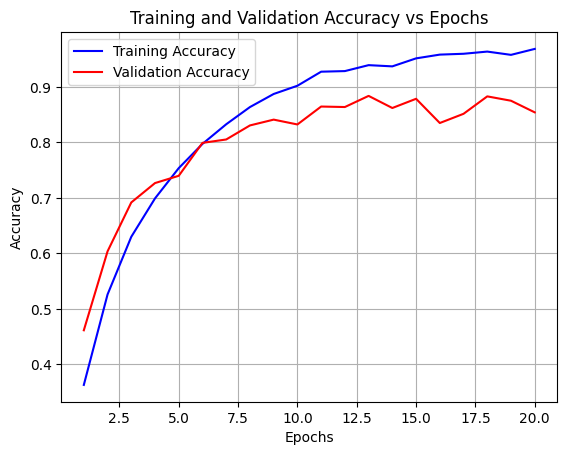

In [25]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Plot the accuracy vs epochs
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()